<center>Myranda Swartzwelter<br>
    DSC-540 T301 Data Preparation<br>
    Final Project<br>
    6/4/2022

Flat File Dataset:

In [99]:
import pandas as pd
import numpy as np
import us
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
#Load CSV
flat_file = pd.read_csv('states_all.csv')
flat_file.head()

#we'll replace every NaN with the median value for that column

flat_file['ENROLL'].replace(np.nan,flat_file['ENROLL'].median(), inplace=True )
flat_file['ENROLL'].replace(np.nan,flat_file['ENROLL'].median(), inplace=True )

for (columnName, columnData) in flat_file.iteritems():
    if flat_file[columnName].isna().sum() != 0:
        flat_file[columnName].replace(np.nan,flat_file[columnName].median(), inplace=True )
        
#All State names are currently capitalized, but they should be camelcase 
flat_file['STATE'] = flat_file['STATE'].str.capitalize()

#Remove 'national and dodea' states
flat_file = flat_file[flat_file.STATE != 'Dodea']
flat_file = flat_file[flat_file.STATE != 'National']

# Create New Variable With State Abbreviations
flat_file['STATE'] = flat_file['STATE'].str.title()
flat_file['STATE'] = flat_file['STATE'].str.replace('_', ' ' )

flat_file['STATE'] = flat_file['STATE'].str.replace('District Of Columbia', 'District of Columbia')
state_dict = us.states.mapping('name', 'abbr')
flat_file['StAbbr'] = flat_file['STATE'].map(state_dict)


#Use abbreviation and year to create new primary key so we can join with other data sets.
flat_file['PRIMARY_KEY'] = flat_file['YEAR'].astype(str) + '_' +  flat_file['StAbbr']

In [74]:
flat_file

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,StAbbr
0,1992_AL,Alabama,1992,649933.5,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,405111.5,186919.0,731634.0,208.0,252.0,207.0,265.0,AL
1,1992_AK,Alaska,1992,649933.5,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,405111.5,186919.0,122487.0,238.0,280.5,220.0,265.0,AK
2,1992_AZ,Arizona,1992,649933.5,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,405111.5,186919.0,673477.0,215.0,265.0,209.0,265.0,AZ
3,1992_AR,Arkansas,1992,649933.5,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,405111.5,186919.0,441490.0,210.0,256.0,211.0,265.0,AR
4,1992_CA,California,1992,649933.5,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,405111.5,186919.0,5254844.0,208.0,261.0,202.0,265.0,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VA,Virginia,2019,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,...,47880.0,39408.0,405111.5,186919.0,645805.0,247.0,287.0,224.0,262.0,VA
1711,2019_WA,Washington,2019,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,...,47880.0,39408.0,405111.5,186919.0,645805.0,240.0,286.0,220.0,266.0,WA
1712,2019_WV,West Virginia,2019,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,...,47880.0,39408.0,405111.5,186919.0,645805.0,231.0,272.0,213.0,256.0,WV
1713,2019_WI,Wisconsin,2019,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,2658253.0,...,47880.0,39408.0,405111.5,186919.0,645805.0,242.0,289.0,220.0,267.0,WI


Website Dataset

In [75]:
#import packages
from bs4 import BeautifulSoup
import requests
import seaborn as sns


In [169]:
#Read the page using bs4
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36'
    }

url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate"
req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html.parser')
tables = soup.find_all("table")

#find the right table
data_tables = soup.find("table", {"class": "wikitable sortable mw-datatable static-row-numbers" })

header1 = [th.getText().strip() for th in data_tables.findAll('th')]

headers = []
for name in header1:
    headers.append(name.strip())
    
headers = headers[0:14]
headers.remove('2020')
headers.remove('Historical Violent Crime Rates')

#get table body
table_body = data_tables.findAll('tbody')[0]
#get rows from body excluding header
table_rows = table_body.findAll('tr')[1:]

#find the data and put it into a list
data_rows = []
for row in table_rows:
     td = row.findAll('td')
     row1 = []
     for td in td:
        row1.append(td.get_text().strip())
     data_rows.append(row1)
    
df1 = pd.DataFrame(data_rows, columns=headers)

#Bonus data transformation: remove null rows
data = df1.drop(labels=[0,1,54], axis=0)

#The incidence count and violent crime rate are only for 2020 - putting that in the title
data.rename(columns={'State or Territory':'state','Incidence Count':'incidence_count_2020', 'Violent Crime Rate':'violent_crime_rate_2020'}, inplace=True)

data['2011'] = data['2011'].apply(pd.to_numeric, errors='coerce')
data['2012'] = data['2012'].apply(pd.to_numeric, errors='coerce')
data['2013'] = data['2013'].apply(pd.to_numeric, errors='coerce')
data['2014'] = data['2014'].apply(pd.to_numeric, errors='coerce')
data['2015'] = data['2015'].apply(pd.to_numeric, errors='coerce')
data['2016'] = data['2016'].apply(pd.to_numeric, errors='coerce')
data['2017'] = data['2017'].apply(pd.to_numeric, errors='coerce')
data['2018'] = data['2018'].apply(pd.to_numeric, errors='coerce')
data['2019'] = data['2019'].apply(pd.to_numeric, errors='coerce')

data.rename(columns={'2019':'violent_crime_rate_2019','2018':'violent_crime_rate_2018','2017':'violent_crime_rate_2017', '2016':'violent_crime_rate_2016','2015':'violent_crime_rate_2015','2014':'violent_crime_rate_2014','2013':'violent_crime_rate_2013','2012':'violent_crime_rate_2012','2011':'violent_crime_rate_2011'}, inplace=True)

#Need to replace commas in this column or the to_numeric function will return nulls
data['incidence_count_2020'] = data['incidence_count_2020'].str.replace(',', '')
data['incidence_count_2020'] = data['incidence_count_2020'].apply(pd.to_numeric, errors='coerce')

data['violent_crime_rate_2020'] = data['violent_crime_rate_2020'].apply(pd.to_numeric, errors='coerce')

state_dict = us.states.mapping('name', 'abbr')
data['state_abbr'] = data['state'].map(state_dict)
data

,state,incidence_count_2020,violent_crime_rate_2020,violent_crime_rate_2019,violent_crime_rate_2018,violent_crime_rate_2017,violent_crime_rate_2016,violent_crime_rate_2015,violent_crime_rate_2014,violent_crime_rate_2013,violent_crime_rate_2012,violent_crime_rate_2011,state_abbr
2,District of Columbia,7127,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8,1202.1,DC
3,Alaska,6126,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5,AK
4,New Mexico,16393,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5,NM
5,Tennessee,46328,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2,TN
6,Arkansas,20363,671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6,480.9,AR
7,Arizona,35980,654.8,447.1,475.7,505.7,471.0,410.2,392.7,405.8,428.6,405.9,AZ
8,Louisiana,29704,639.4,559.7,543.3,556.3,565.0,539.7,515.9,510.4,496.3,555.3,LA
9,Missouri,33385,542.7,499.6,501.4,531.2,520.8,497.4,443.3,422.0,451.3,447.4,MO
10,South Carolina,27691,530.7,510.1,500.8,506.1,506.8,504.5,497.8,494.8,560.5,571.9,SC
11,South Dakota,4476,501.4,397.1,396.4,429.8,422.0,383.1,328.3,398.7,323.8,354.1,SD


API Data

In [113]:
#Set up API necessities - params used for each call and API Key (not to be published)
params = 'B02001_001E,B02008_001E,B02009_001E,B02010_001E,B02011_001E,B02012_001E,B02013_001E'
columns_dict ={'NAME':'state_name'
              ,'B02001_001E':'total_population'
              ,'B02008_001E':'white'
              ,'B02009_001E':'black_or_african_american'
              ,'B02010_001E':'american_indian'
              ,'B02011_001E':'asian'
              ,'B02012_001E': 'native_hawaiian_or_pacific_islander'
              ,'B02013_001E':'other'}

api_key = '3245c38fef6dd9b391ef8ebdae8af59612899e29'

def connect_to_endpoint(url):#, headers, params):
    response = requests.request("GET", url)
    #Prints status code - uncomment if you want to see this
    #print("Endpoint Response Code: " + str(response.status_code))
    
    #raise exception if failed
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

def access_api(year_int,params, api_key):
    year = str(year_int)
    census_url = 'https://api.census.gov/data/'+year+'/acs/acs1?get=NAME,'+params+'&for=state:*&key='
    url = census_url + api_key
    data = connect_to_endpoint(url)
    new_df = pd.DataFrame(data)
    new_df.rename(columns=new_df.iloc[0], inplace=True)
    new_df.drop(new_df.index[0], inplace=True)
    new_df.rename(columns= columns_dict, inplace = True)
    new_df['year'] = year
    new_df.drop('state',1, inplace=True)
    return new_df

#First call the last year we need to get the base for our dataset
aggregate_data = access_api(2019, params, api_key)

#Then loop through 2005 - 2018 to get remaining datasets
year_int = 2005
while year_int < 2019:
    new_df = access_api(year_int, params, api_key)
    
    #Step 6 aggregate data!
    aggregate_data = aggregate_data.append(new_df)
    year_int = year_int+1

#For combining this data with all my other data, I need the 2 letter state abbreviation in a column
state_dict = us.states.mapping('name', 'abbr')
aggregate_data['state_abbr'] = aggregate_data['state_name'].map(state_dict)

columns = ['total_population', 'white', 'black_or_african_american', 
          'american_indian', 'asian', 'native_hawaiian_or_pacific_islander', 'other', 'year']

#Convert columns that should be integers to numeric
for column_name in columns:
    aggregate_data[column_name] = pd.to_numeric(aggregate_data[column_name],errors = 'coerce')
    
aggregate_data

,state_name,total_population,white,black_or_african_american,american_indian,asian,native_hawaiian_or_pacific_islander,other,year,state_abbr
1,Illinois,12671821,9353507,1951681,101823,834455,16155,796594,2019,IL
2,Georgia,10617423,6363129,3556697,91801,523612,17766,368840,2019,GA
3,Idaho,1787065,1652946,21666,43756,44416,7130,80118,2019,ID
4,Hawaii,1415872,582436,49041,31936,801987,354987,44491,2019,HI
5,Indiana,6732219,5732778,740150,53972,206288,8652,175969,2019,IN
...,...,...,...,...,...,...,...,...,...,...
48,Vermont,626299,600494,12187,7315,15706,806,3240,2018,VT
49,Utah,3161105,2800377,58241,56454,115638,47609,191869,2018,UT
50,Virginia,8517685,6043577,1807434,90683,688297,19169,253957,2018,VA
51,Washington,7535591,6041370,422547,226088,857031,95373,398348,2018,WA


Create Database to Combine Datasets

In [172]:
#import packages
import sqlite3

#create database
conn = sqlite3.connect('final_project_database') 
c = conn.cursor()

#create the 3 tables from each dataframe 
flat_file.to_sql(name='flat_file', con=conn)

data.to_sql(name='web_data', con=conn)

aggregate_data.to_sql(name='api_data', con=conn)

#commit to database
conn.commit()

In [173]:
#Check successful connection by getting a list of tables
def check_con(conn):
    try:
        cursor_obj = conn.cursor()
        cursor_obj.execute('SELECT name from sqlite_master where type= "table"')
        print(cursor_obj.fetchall())
    except:
        print("Connection not successful.")
        
check_con(conn)

[('flat_file',), ('web_data',), ('api_data',)]


In [174]:
#Create Crime Rates Table
query = "CREATE TABLE crime_rates as SELECT state_abbr, '2020' as year,violent_crime_rate_2020 as violent_crime_rate from web_data UNION ALL SELECT state_abbr, '2019' as year,violent_crime_rate_2019 as violent_crime_rate from web_data UNION ALL SELECT state_abbr, '2018' as year,violent_crime_rate_2018 as violent_crime_rate from web_data UNION ALL SELECT state_abbr, '2017' as year,violent_crime_rate_2017  as violent_crime_rate from web_data UNION ALL SELECT state_abbr, '2016' as year,violent_crime_rate_2016 as violent_crime_rate from web_data UNION ALL SELECT state_abbr, '2015' as year,violent_crime_rate_2015 as violent_crime_rate from web_data UNION ALL SELECT state_abbr, '2014' as year,violent_crime_rate_2014 as violent_crime_rate from web_data UNION ALL SELECT state_abbr, '2013' as year,violent_crime_rate_2013 as violent_crime_rate from web_data UNION ALL SELECT state_abbr, '2012' as year,violent_crime_rate_2012 as violent_crime_rate from web_data UNION ALL SELECT state_abbr, '2011' as year,violent_crime_rate_2011 as violent_crime_rate from web_data"

#Execute query and create dataframe    

def execute_query(conn, query):
    cursor_obj  = conn.cursor()
    cursor_obj.execute(query)
    #rows = cursor_obj.fetchall()
    #for row in rows:
        #print(row)
execute_query(conn, query)


In [189]:
#Create query to combine data
query = "SELECT flat_file.STATE, flat_file.YEAR, ENROLL,TOTAL_REVENUE, FEDERAL_REVENUE,STATE_REVENUE, LOCAL_REVENUE, TOTAL_EXPENDITURE,AVG_MATH_4_SCORE, total_population,white,black_or_african_american, american_indian, asian, native_hawaiian_or_pacific_islander,violent_crime_rate  from flat_file  join crime_rates on flat_file.StAbbr = crime_rates.state_abbr and flat_file.YEAR = crime_rates.year  join api_data on flat_file.StAbbr = api_data.state_abbr and flat_file.YEAR = api_data.year"

#Execute query and create dataframe    
def execute_query(conn, query):
    result = conn.execute(query)
    cols = [column[0] for column in result.description]
    results= pd.DataFrame.from_records(data = result.fetchall(), columns = cols)
    return results
        
combined_data_set = execute_query(conn, query)

In [190]:
#Show combined data set!
combined_data_set

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,AVG_MATH_4_SCORE,total_population,white,black_or_african_american,american_indian,asian,native_hawaiian_or_pacific_islander,violent_crime_rate
0,Alabama,2011,746933.0,7376725.0,1077070.0,3965614.0,2334041.0,7411768.0,231.0,4802740,3373539,1307900,54540,66678,3782,420.1
1,Alaska,2011,131704.0,2357828.0,420152.0,1416163.0,521513.0,2443898.0,236.0,722718,533690,36376,142478,50181,11533,606.5
2,Arizona,2011,946571.0,8429186.0,1245814.0,3054501.0,4128871.0,8610417.0,235.0,6482505,5308097,323562,346380,235750,22939,405.9
3,Arkansas,2011,475551.0,5176362.0,827026.0,3701224.0,648112.0,5669431.0,238.0,2937979,2348406,482548,46716,42799,8588,480.9
4,California,2011,6202604.0,70953331.0,9990221.0,37752712.0,23210398.0,69847705.0,234.0,37691912,25002505,2664982,689320,5643693,294022,411.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Virginia,2019,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,247.0,8535519,5994267,1820891,76902,690204,16638,209.4
404,Washington,2019,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,240.0,7614893,6056387,429718,228712,883108,100352,303.3
405,West Virginia,2019,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,231.0,1792147,1697080,86426,11575,20033,1710,318.9
406,Wisconsin,2019,649933.5,5085826.0,403548.0,2537754.0,2058996.0,5242672.0,242.0,5822434,5088607,438719,92246,201512,7925,297.1


Create 5 Visualizations from the combined datasets

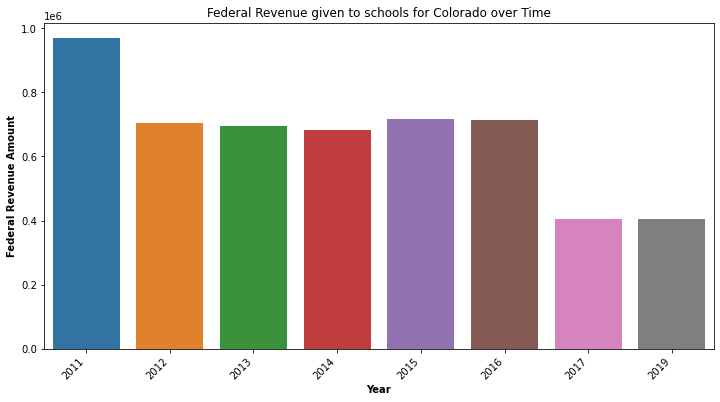

In [210]:
#Visualization #1: Looking at the Federal Revenue given to schools for Colorado over Time

colorado = combined_data_set.loc[combined_data_set['STATE'] == 'Colorado']

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x=colorado['YEAR'], y=colorado['FEDERAL_REVENUE'])
ax.set_xticklabels(labels=colorado['YEAR'].sort_values().unique(), rotation=45, ha='right')
ax.set_title('Federal Revenue given to schools for Colorado over Time')
ax.set_ylabel('Federal Revenue Amount', fontweight ='bold')
ax.set_xlabel('Year', fontweight ='bold');


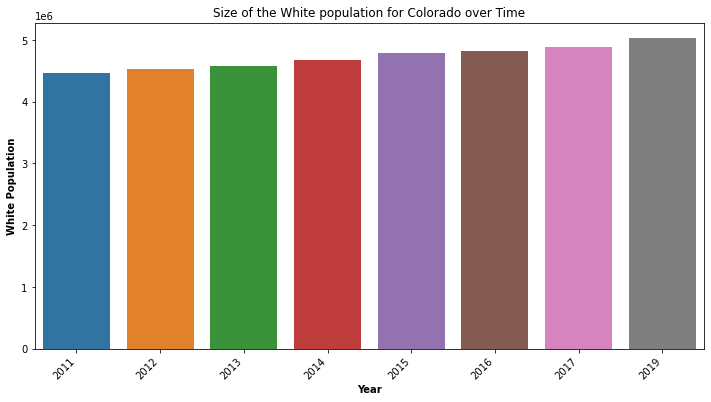

In [211]:
#Visualization #2: Looking at the size of the 'White' population for Colorado over Time

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x=colorado['YEAR'], y=colorado['white'])
ax.set_xticklabels(labels=colorado['YEAR'].sort_values().unique(), rotation=45, ha='right')
ax.set_title('Size of the White population for Colorado over Time')
ax.set_ylabel('White Population', fontweight ='bold')
ax.set_xlabel('Year', fontweight ='bold');

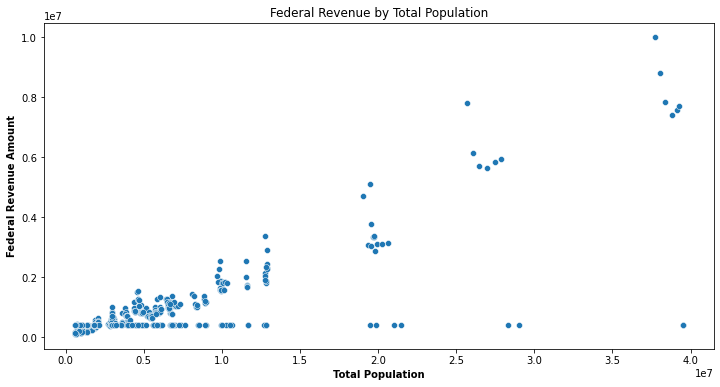

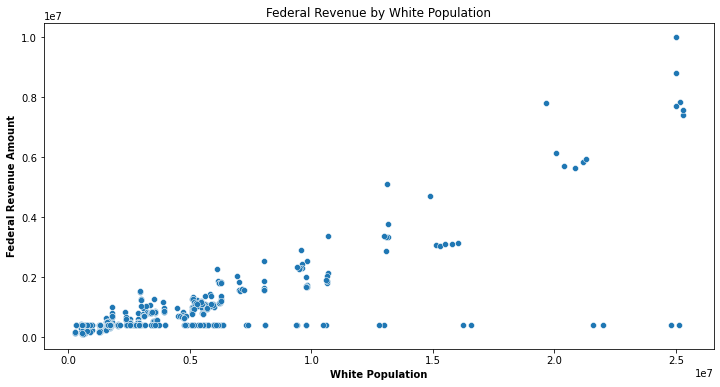

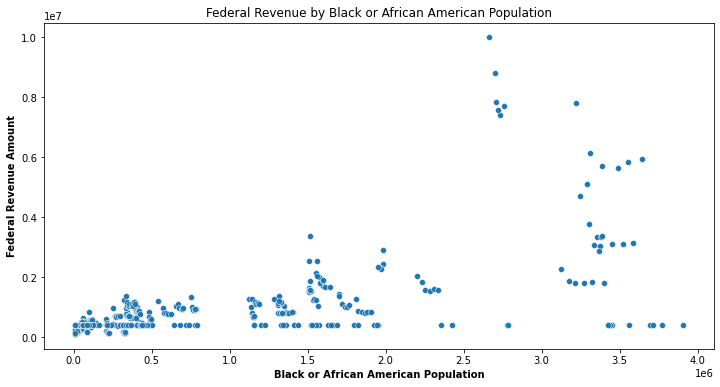

In [212]:
#Visualization #3: Combining the Census Dataset and the School dataset to understand how Federal Revenue is related to population and demographics
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.scatterplot(x=combined_data_set['total_population'], y=combined_data_set['FEDERAL_REVENUE'])
ax.set_title('Federal Revenue by Total Population')
ax.set_ylabel('Federal Revenue Amount', fontweight ='bold')
ax.set_xlabel('Total Population', fontweight ='bold');

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.scatterplot(x=combined_data_set['white'], y=combined_data_set['FEDERAL_REVENUE'])
ax.set_title('Federal Revenue by White Population')
ax.set_ylabel('Federal Revenue Amount', fontweight ='bold')
ax.set_xlabel('White Population', fontweight ='bold');


fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.scatterplot(x=combined_data_set['black_or_african_american'], y=combined_data_set['FEDERAL_REVENUE'])
ax.set_title('Federal Revenue by Black or African American Population')
ax.set_ylabel('Federal Revenue Amount', fontweight ='bold')
ax.set_xlabel('Black or African American Population', fontweight ='bold');




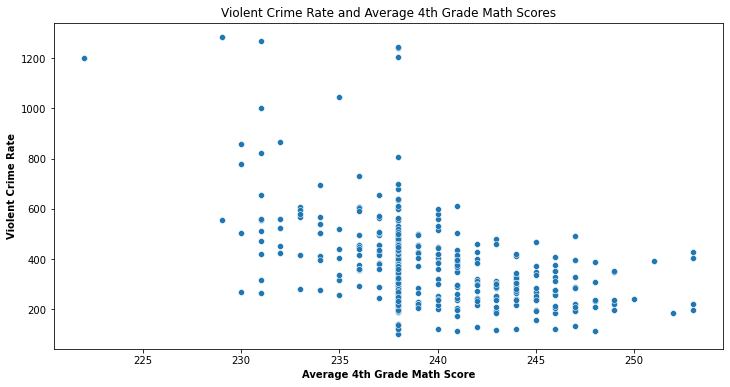

In [214]:
#Visualization #4 Looking to see if there is a relationship between Average Math Scores for 4th graders and Violent Crime rate
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.scatterplot(x=combined_data_set['AVG_MATH_4_SCORE'], y=combined_data_set['violent_crime_rate'])
ax.set_title('Violent Crime Rate and Average 4th Grade Math Scores')
ax.set_ylabel('Violent Crime Rate', fontweight ='bold')
ax.set_xlabel('Average 4th Grade Math Score', fontweight ='bold');

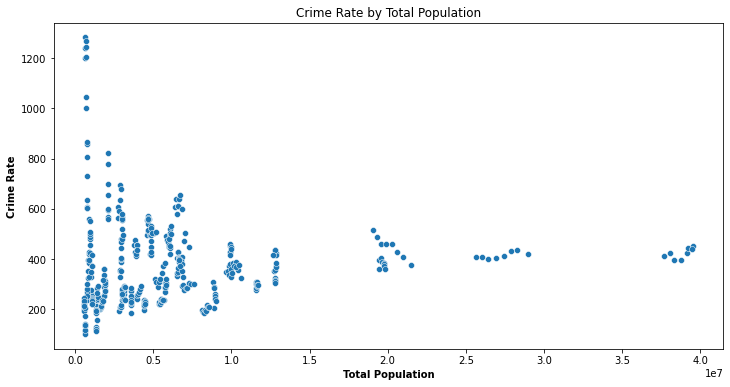

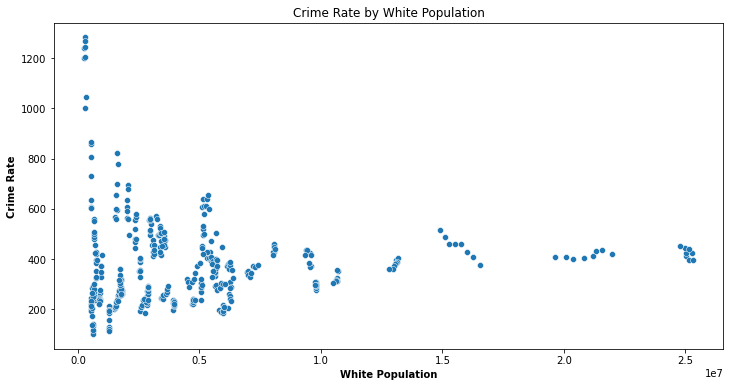

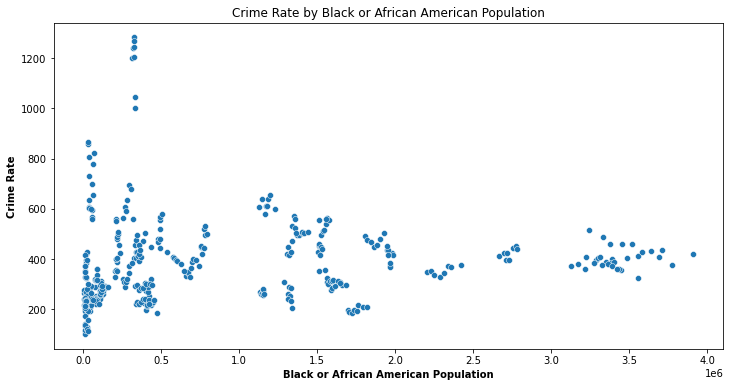

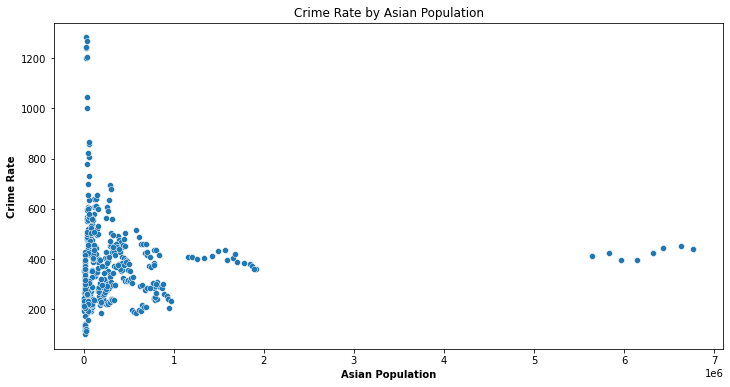

In [220]:
#Visualization #5 - Looking at Population and Demographics and Violent Crime Rates to see if there is a relationship

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.scatterplot(x=combined_data_set['total_population'], y=combined_data_set['violent_crime_rate'])
ax.set_title('Crime Rate by Total Population')
ax.set_ylabel('Crime Rate', fontweight ='bold')
ax.set_xlabel('Total Population', fontweight ='bold');


fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.scatterplot(x=combined_data_set['white'], y=combined_data_set['violent_crime_rate'])
ax.set_title('Crime Rate by White Population')
ax.set_ylabel('Crime Rate', fontweight ='bold')
ax.set_xlabel('White Population', fontweight ='bold');

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.scatterplot(x=combined_data_set['black_or_african_american'], y=combined_data_set['violent_crime_rate'])
ax.set_title('Crime Rate by Black or African American Population')
ax.set_ylabel('Crime Rate', fontweight ='bold')
ax.set_xlabel('Black or African American Population', fontweight ='bold');

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.scatterplot(x=combined_data_set['asian'], y=combined_data_set['violent_crime_rate'])
ax.set_title('Crime Rate by Asian Population')
ax.set_ylabel('Crime Rate', fontweight ='bold')
ax.set_xlabel('Asian Population', fontweight ='bold');




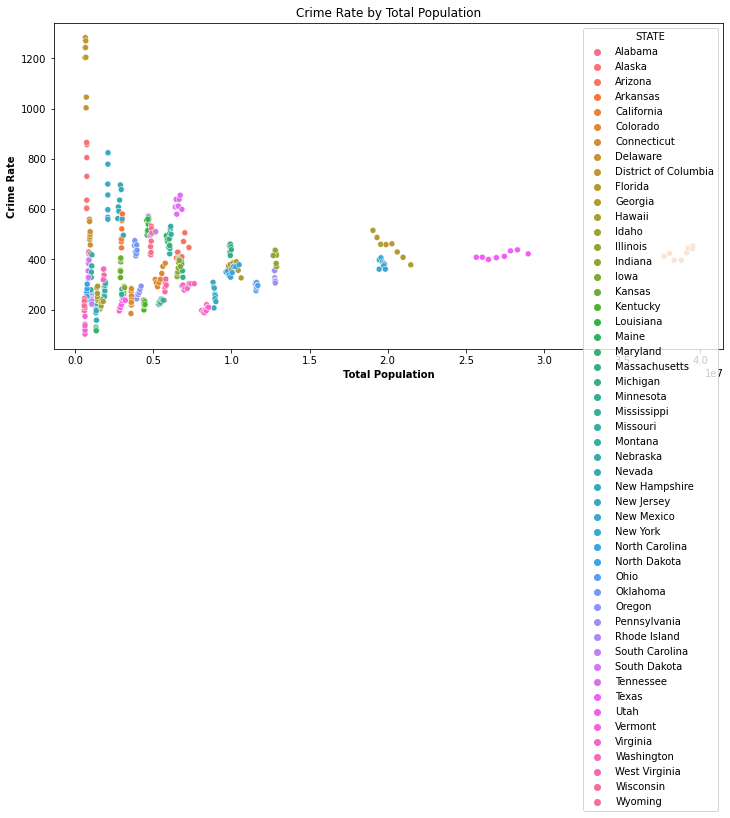

In [221]:
#Since the above visualization did not show much of a relationship, I also wanted to look at this with state coloring the scatterplots

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.scatterplot(x=combined_data_set['total_population'], y=combined_data_set['violent_crime_rate'], hue=combined_data_set['STATE'])
ax.set_title('Crime Rate by Total Population')
ax.set_ylabel('Crime Rate', fontweight ='bold')
ax.set_xlabel('Total Population', fontweight ='bold');